<a href="https://colab.research.google.com/github/DwijBishnoi/DwijBishnoi.github.io/blob/main/test1/ARIMA_V_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

ARIMA Mean Squared Error: 92.72954939419957
Linear Regression Mean Squared Error: 54.31217614380738
ARIMA Mean Absolute Error: 8.450125019843359
ARIMA Root Mean Squared Error: 9.629618341045484
ARIMA R-squared: -0.17900903551595615
Linear Regression Mean Absolute Error: 6.89018220269061
Linear Regression Root Mean Squared Error: 7.369679514321324
Linear Regression R-squared: 0.30944831684808594


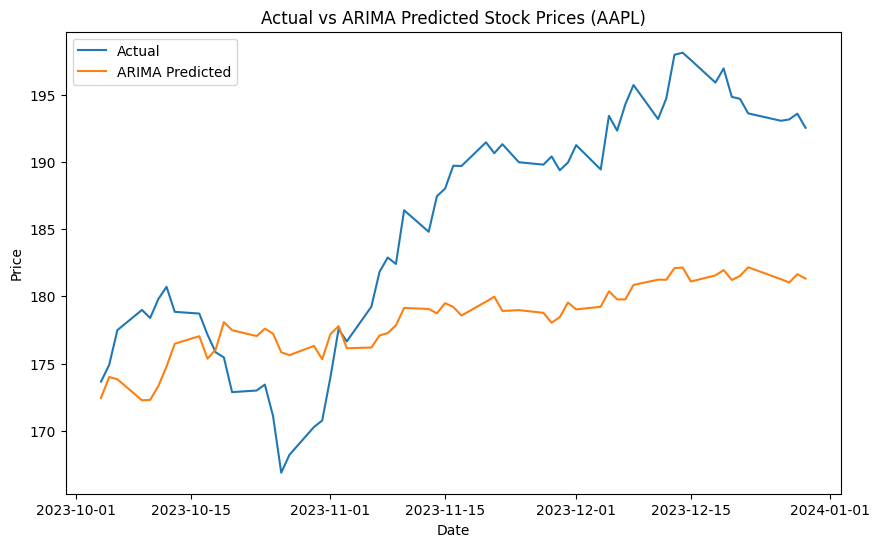

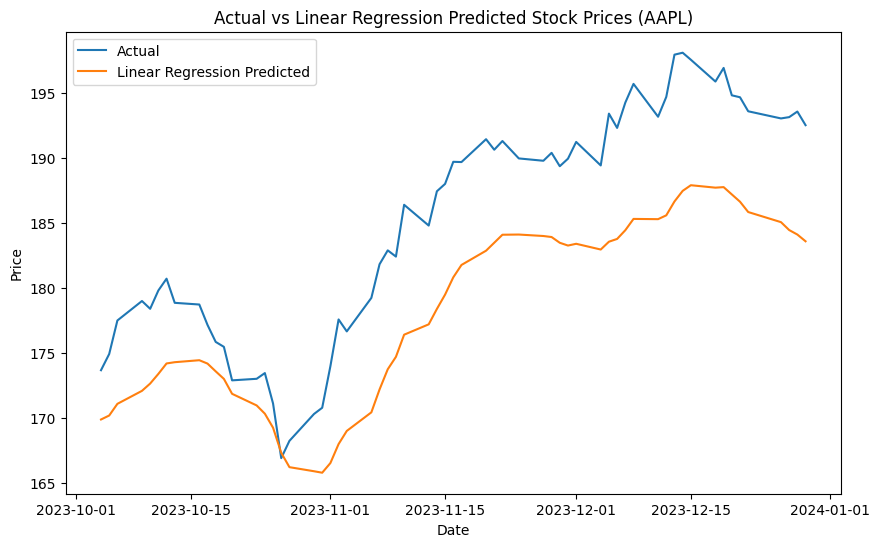

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = data.index

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
X = data[['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']]
y = data['Close']

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ARIMA Model
arima_model = ARIMA(y_train, order=(28,2,16))
fitted_arima_model = arima_model.fit()
arima_predictions = fitted_arima_model.forecast(steps=len(X_test))

# Linear Regression Model
lr_model = make_pipeline(StandardScaler(), LinearRegression())
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate Mean Squared Error for ARIMA and Linear Regression
arima_mse = mean_squared_error(y_test, arima_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print('ARIMA Mean Squared Error:', arima_mse)
print('Linear Regression Mean Squared Error:', lr_mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
arima_mae = mean_absolute_error(y_test, arima_predictions)
print('ARIMA Mean Absolute Error:', arima_mae)

# Root Mean Squared Error
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
print('ARIMA Root Mean Squared Error:', arima_rmse)

# R-squared
arima_r_squared = r2_score(y_test, arima_predictions)
print('ARIMA R-squared:',arima_r_squared)

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test, lr_predictions)
print('Linear Regression Mean Absolute Error:', lr_mae)

# Root Mean Squared Error
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print('Linear Regression Root Mean Squared Error:', lr_rmse)

# R-squared
lr_r_squared = r2_score(y_test, lr_predictions)
print('Linear Regression R-squared:',lr_r_squared)



# Visualize actual vs predicted for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], arima_predictions, label='ARIMA Predicted')
plt.title('Actual vs ARIMA Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualize actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], lr_predictions, label='Linear Regression Predicted')
plt.title('Actual vs Linear Regression Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()